# Tutorial: Coupled Climate Networks

The objective of this tutorial is to introduce *coupled climate subnetwork analysis*, which uses *interacting networks* in order to study the statistical relationships between several fields of climatological observables, or between a climatolical obervable at different vertical levels.

First, some theoretical background on *interacting networks* is given and the method of *coupled climate network analysis* is explained. Then, some methods provided by ``pyunicorn`` are illustrated by the example of the Earth's atmosphere’s vertical dynamical structure. An introduction to (single layer) *climate networks* and their application with the ``pyunicorn`` package can be found in  the tutorial [Climate Networks](https://github.com/pik-copan/pyunicorn/blob/master/notebooks/tutorial_ClimateNetworks.ipynb). For a detailed discussion and further references, please consult [Donges et al. (2015)](https://aip.scitation.org/doi/10.1063/1.4934554) and [Donges et al. (2011)](https://link.springer.com/article/10.1140/epjb/e2011-10795-8), on which this tutorial is based.

## Introduction

*Coupled climate networks* are a very useful tool for representing and studying the statistical relationship between different climatological variables, or between a single variable at different physically separable levels. This can be useful for finding spatial as well as temporal patterns that account for a large fraction of the fields' variance. The method can also be applied to study the complex interactions between different domains of the Earth system, e.g., the atmosphere, hydrosphere, cryosphere and biosphere, which still remains a great challenge for modern science. The urge to make progress in this field is particularly pressing, as substantial and mutually interacting components of the Earth system (tipping elements) may soon pass a bifurcation point (tipping point) due to global climate change. Mapping the complex interdependency structure of subsystems, components or processes of the Earth system to a network of interacting networks provides a natural, simplified and condensed mathematical representation.

## Theory of Interacting Networks

The structure of many complex systems can be described as a *network of interacting, or interdependent, networks*. Notable examples are representations of the mammalian cortex, systems of interacting populations of heterogeneous oscillators, or mutually interdependent infrastructure networks. 

``pyunicorn`` provides the class `core.InteractingNetworks`for constructing and analysing all kinds of interacting networks. *Coupled climate networks* are the application of *interacting networks* to *climate networks*, and hence, the class `climate.CoupledClimateNetworks` inherits from `core.InteractingNetworks` and `climate.ClimateNetworks`.

*Interacting networks* can be represented by decomposing a network $G=(V,E)$ into a collection of $M$ *subnetworks* 
$G_i=(V_i,E_{ii})$. Here, $(V_i)_i$ denote the disjoint sets of nodes corresponding to each subnetwork, such that $\bigcup^M_{i=1}V_i=V$. The internal link sets $(E_{ii})_i$ contain information on the connections within a subnetwork,
and disjoint sets of cross-links $E_{ij}\;(i\neq j)$ connect nodes in different subnetworks, such that $\bigcup^M_{i,j=1}E_{ij}=E$. 
Alternatively, a network of networks of this type can be represented by a standard adjacency matrix $A$ with   with block structure.

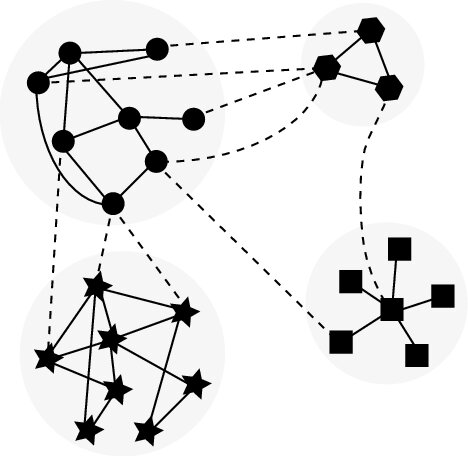

In the following, we introduce some local and global measures for interacting networks. 
The indices $i,j,k,l$ always denote subnetworks, while $v,w,p,q$ designate single vertices, and we always assume $v\in V_i$. The formulae explicitly account
for the general case $i \ne j$, but can be nevertheless easily modified to suit the special case $i = j$. Furthermore, the term *cross* refers to the interaction between subnetworks $G_i,G_j$, whereas *internal* refers to the structure within a single subnetwork.

### Local Measures

The **cross-degree centrality** $k_v^{ij}$ gives the number of neighbours of the vertex $v$ within subnetwork $G_j$,
$$k_v^{ij}=\sum_{q\in V_j}A_{vq}\,,\quad v \in V_i.$$

The **cross-closeness centrality** $c^{ij}_v$ measures the topological closeness of $v$ to subnetwork $G_j$ along shortest paths,
$$ c^{ij}_v = \frac{N_j}{\sum_{q\in V_j}d_{vq}}\,,$$
where $d_{vq}$ is the shortest path length between vertices $v$ and $q$,
and $N_j$ denotes the number of vertices in the subnetwork $G_j$.

For any vertex $w \in V$, the **cross-betweenness centrality** $b^{ij}_w$ indicates its role for mediating interactions between two subnetworks $G_i$ and $G_j$,
$$ b^{ij}_w= \sum_{p\in V_i,\,q \in V_j,\,p,q\ne w}\frac{\sigma_{pq}(w)}{\sigma_{pq}}= b^{ji}_w\,,$$
where $\sigma_{pq}(w)$ denotes the total number of shortest paths from $p \in V_i$ to $q \in V_j$ that include $w$.

### Global Measures

The **cross-edge density** $\rho_{ij}$ measures the density of connections between distinct subnetworks $G_i$ and $G_j$,
$$ \rho_{ij}=\frac{|E_{ij}|}{N_i N_j}= \rho_{ji}\,.$$

The **cross-average path length** $\mathcal{L}_{ij}$ measures the average length of existing shortest paths between two subnetworks $G_i$ and $G_j$,
$$ \mathcal{L}_{ij}= \frac{1}{N_i N_j - M_{ij}}\sum_{v\in V_i,\,q\in V_j,\,d_{vq}<\infty}d_{vq}= \mathcal{L}_{ji}\,, $$
where $M_{ij}$ is the number of pairs $(v,q)\in V_i\times V_j$ which are not mutually reachable.

The **global cross-clustering coefficient** $\mathcal{C}_{ij}$ is an estimate of the probability of vertices from subnetwork $G_i$ to have mutually connected neighbours within subnetwork $G_j$,
$$ \mathcal{C}_{ij} = \langle \mathcal{C}^{ij}_v \rangle_{v\in V_i} = \frac{1}{N_i}\sum_{v\in V_i,\, k_v^{ij}>1}\frac{\sum_{p\ne q \in V_j}A_{vp}A_{pq}A_{qv}}{\sum_{p \ne  q \in V_j}A_{vp}A_{vq}}\,.$$

The **cross-transitivity** $\mathcal{T}_{ij}$ is the conditional probability that two vertices in subnetwork $G_j$ are connected if they have a common neighbour in subnetwork $G_i$,
$$ \mathcal{T}_{ij}= \frac{\sum_{v\in V_i,\,p\ne q \in V_j}A_{vp}A_{pq}A_{qv}}{\sum_{v\in V_i,\,p\ne q \in V_j}A_{vp}A_{vq}}\,.$$

## Application: Vertical Dynamical Structure of the Earth’s Atmosphere

In the following, coupled climate network analysis is illustrated by the example of the dynamical structure of the Earth's atmosphere. 
In order to treat a climate network as a network of networks, an *ab initio* physical separation of the climatological fields is necessary, i.e., a separation of processes into those responsible for internal coupling within a single field and those mediating interactions between fields.

For the Earth system, there are distinct physical processes behind *quasi-horizontal* and *vertical* atmospheric dynamics: We have a stable isobaric quasi-horizontal stratification, while local heating of the Earth’s surface and atmosphere induces minor disturbances of the system. Therefore, we can treat the considered climatological field variables at different isobaric quasi-horizontal surfaces as separated subnetworks of an interconnected network.
The small vertical disturbances of the system due to convection processes lead to vertical movement, resulting in pressure gradients that are balanced by quasi-horizontal geostrophic winds along isobares.

We consider the discretised and vertically resolved geopotential height field $Z^i_v(t)$, sampled at predefined points $v$ on isobaric surfaces $i$, as the climatological field variable to construct coupled climate networks. It reflects global weather and climate dynamics to a good approximation, as it captures the dynamics both of the geostrophic wind field and of convection processes.
We specifically focus on the interaction structure between near ground and upper level atmospheric dynamics, which is particularly interesting because a large portion of the solar forcing that drives atmospheric dynamics takes place on the Earth’s surface.

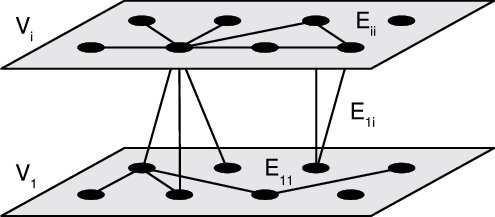

## Computing a Coupled Climate Network
### Loading the Climate Data

For this tutorial, we download [Reanalysis 1 data](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html) provided by the *National Center for Environmental Prediction / National Center for Atmospheric Research* (NCEP-NCAR). This data set contains the monthly averaged geographical height potential for 17 isobaric surfaces $P_i$ of the atmosphere, on an equally spaced spherical grid with a latitude and longitude resolution of $2.5° \!\times\! 2.5°$.

In [1]:
DATA_NAME = "hgt.mon.mean.nc"
DATA_URL = f"https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Monthlies/pressure/{DATA_NAME}"
DATA_FILE = f"./data/{DATA_NAME}"
![ -f {DATA_FILE} ] || wget -O {DATA_FILE} -nv --show-progress "{DATA_URL}"

./data/hgt.mon.mean 100%[===================>] 296.75M  5.21MB/s    in 28s     
2024-02-05 03:21:41 URL:https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Monthlies/pressure/hgt.mon.mean.nc [311163603/311163603] -> "./data/hgt.mon.mean.nc" [1]


Now we will start with some imports and some specifications regarding the data set.

In [2]:
import numpy as np
from pyunicorn import climate
from matplotlib import pyplot as plt

In [3]:
#  Indicate data source (optional)
DATA_SOURCE = "NCEP-NCAR Reanalysis 1"
#  Type of data file ("NetCDF" indicates a NetCDF file with data on a regular
#  lat-lon grid, "iNetCDF" allows for arbitrary grids - > see documentation).
FILE_TYPE = "NetCDF"
#  Name of observable in NetCDF file ("hgt" indicates the monthly mean of the geopotential height
#  in the NCEP/NCAR reanalysis data)
OBSERVABLE_NAME = "hgt"
#  Select a region in time and space from the data.
#  If the boundaries are equal, the data's full range is selected.
#  For this tutorial, we choose a window for latitude and longitude corresponding to North America.
WINDOW = {"time_min": 0., "time_max": 0., "lat_min": 45, "lon_min": 80,
          "lat_max": 60, "lon_max": 120} 
#  Indicate the length of the annual cycle in the data (e.g., 12 for monthly
#  data). This is used for calculating climatological anomaly values.
TIME_CYCLE = 12

We will first generate a separate `pyunicorn.climate.ClimateData` instance from our data file for each of the 17 vertical levels, which will then be coupled to the near ground level in the following steps. 

In [4]:
# number of total vertical levels in the data file
VERTICAL_LEVELS = 17
# loop over all levels to create a `ClimateData` object for each level
data = np.array([climate.ClimateData.Load(
    file_name=DATA_FILE, observable_name=OBSERVABLE_NAME,
    data_source=DATA_SOURCE, file_type=FILE_TYPE,
    window=WINDOW, time_cycle=TIME_CYCLE,
    #  The `vertical_level` argument indicates the vertical level to be extracted from the data file,
    #  and is ignored for horizontal data sets. If `None`, the first level in the data file is chosen.
    vertical_level=l) for l in range(VERTICAL_LEVELS)])

Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...
Reading NetCDF File and converting data to NumPy array...


One can use the `print()` function on a `ClimateData` object in order to show some information about the data.

In [5]:
print(data[0])

Global attributes:
description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
platform: Model
Conventions: COARDS
NCO: 20121012
history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Datasets/nmc.reanalysis/pressure/hgt.79.nc to hgt.95.nc
Converted to chunked, deflated non-packed NetCDF4 2014/09
title: monthly mean hgt from the NCEP Reanalysis
dataset_title: NCEP-NCAR Reanalysis 1
References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
Variables (size):
level (17)
lat (73)
lon (144)
time (913)
hgt (913)
ClimateData:
Data: 119 grid points, 108647 measurements.
Geographical boundaries:
         time     lat     lon
   min 1297320.0   45.00   80.00
   max 1963536.0   60.00  120.00


### Constructing the Network

The `pyunicorn.climate.CoupledClimateNetwork` class provides the functionality to generate a complex network from a similarity measure matrix of two time series, e.g., arising from two different observables or from one observable at two vertical levels. The idea of coupled climate networks is based on the concept of coupled patterns, for a review refer to [Bretherton et al. (1992)](https://journals.ametsoc.org/view/journals/clim/5/6/1520-0442_1992_005_0541_aiomff_2_0_co_2.xml). The two observables (layers) need to have the same time grid (temporal sampling points). More information on the construction of a `ClimateNetwork` based on various similarity measures is provided in the tutorial on [Climate Networks](https://github.com/pik-copan/pyunicorn/blob/master/examples/tutorials/ClimateNetworks.ipynb).

For our example, we construct 17 coupled climate networks from the data by coupling the lowest level with each other level, based on Pearson correlation without lag and with a fixed threshold. For the construction of a coupled climate network, one needs to set either the threshold $\beta$ or the link denisty. In this example, we set the threshold $\beta = 0.5$.

In [6]:
#  for setting a fixed threshold
THRESHOLD = 0.5

cross_link_density = []
cross_average_path_length = []
cross_global_clustering = []
cross_transitivity = []
cross_degree = []
cross_closeness = []
cross_betweenness = []

for l in range(VERTICAL_LEVELS):
    # generate a coupled climate network between the ground level and the level l
    coupled_network = climate.CoupledTsonisClimateNetwork(data[0], data[l], threshold=THRESHOLD)

    # calculate global measures
    cross_link_density.append(coupled_network.cross_link_density())
    cross_average_path_length.append(coupled_network.cross_average_path_length())
    cross_global_clustering.append(coupled_network.cross_global_clustering())
    cross_transitivity.append(coupled_network.cross_transitivity())

    # calculate local measures
    cross_degree.append(coupled_network.cross_degree())
    cross_closeness.append(coupled_network.cross_closeness())
    cross_betweenness.append(coupled_network.cross_betweenness())

Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation 

/home/stw/code/pik/pyunicorn/src/pyunicorn/core/interacting_networks.py:962: RuntimeWarning: invalid value encountered in scalar divide
  average_path_length = path_lengths.sum() / norm


Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area weights according to type surface ...
Setting area weights according to type surface ...
Calculating all shortest path lengths...
Calculating daily (monthly) anomaly values...
Calculating correlation matrix at zero lag from anomaly values...
Extracting network adjacency matrix by thresholding...
Setting area we

## Plotting some Coupled Network Measures
### Global Measures

We first determine the average geopotential height for each vertical level (in *km*),
which we will use as an independent variable to plot the global measures that we calculated for the 17 coupled climate networks.

In [7]:
# read out the observable hgt (geopotentential height) and average it for each level
hgt_averaged = np.array([
    np.round(data[l].observable().flatten().mean() / 1000, 1)
    for l in range(VERTICAL_LEVELS)])

In [8]:
def plot_global_coupling(
    measure: np.ndarray, title: str, xlabel: str, xindex: str,
    set_ylabel=True, ax=None):
    """
    Plot the geopotential height over a coupling network measure.
    """
    ax_ = plt if ax is None else ax
    ax_p = lambda p: getattr(*((plt, p) if ax is None else (ax, f"set_{p}")))
    ax_.plot(measure, hgt_averaged, 'o', color='blue')
    ax_p("xlabel")(r"${}".format(xlabel) + xindex + r"$")
    if set_ylabel:
        ax_p("ylabel")(r"$Z_{\,l}$ (km)")
    ax_p("title")(title)

Note that the cross-link density and cross-average path length are symmetrical ($\rho_{1l}=\rho_{l1}$, $\mathcal{L}_{1l} = \mathcal{L}_{l1}$), but the global cross-clustering coefficient and cross-transitivity are not ($\mathcal{C}_{1l} \neq \mathcal{C}_{l1}$, $\mathcal{T}_{1l} \neq \mathcal{T}_{l1}$). When computing asymmetric measures for two coupled climate subnetworks $G_i$ and $G_j$, the methods in `climate.CoupledClimateNetwork` return tuples such as $(\mathcal{C}_{ij},\mathcal{C}_{ji})$ or $(\mathcal{T}_{ij},\mathcal{T}_{ji})$.

In [9]:
def plot_global_symmetric_coupling(measure, title, xlabel):
    plot_global_coupling(measure, title, xlabel, r"_{\,1\,l}")

def plot_global_asymmetric_coupling(measure, title, xlabel):
    fig, axes = plt.subplots(1, 2, layout="constrained")
    fig.suptitle(title)
    # plot both vertical directions of coupling
    for vert in range(2):
        plot_global_coupling(
            measure[:, vert],
            f"pointing {['up', 'down'][vert]}wards", xlabel,
            [r"_{\,1\,l}", r"_{\,l\,1}"][vert],
            set_ylabel=(vert == 0), ax=axes[vert])

#### Cross-Link Density

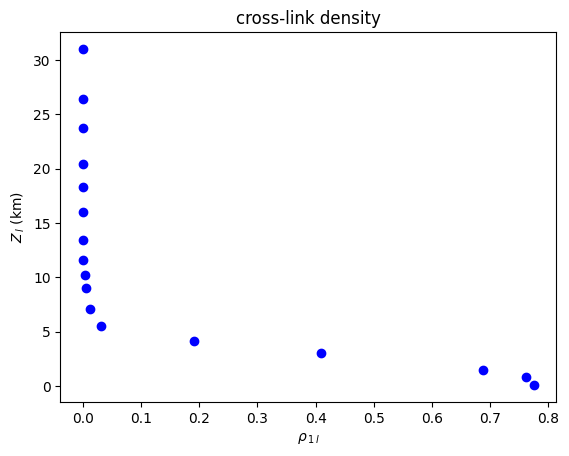

In [10]:
plot_global_symmetric_coupling(cross_link_density, "cross-link density", r"\rho")

#### Cross-Average Path Length

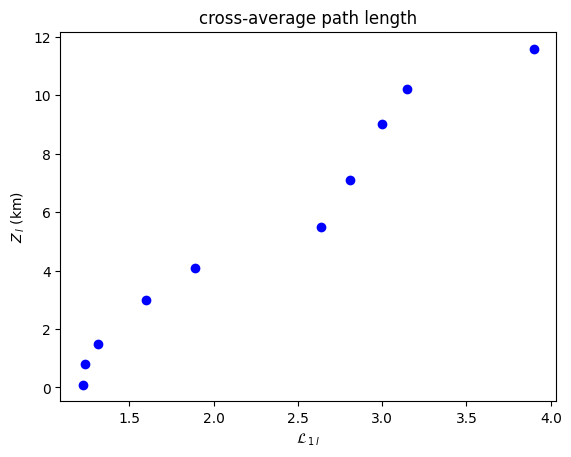

In [11]:
plot_global_symmetric_coupling(cross_average_path_length, "cross-average path length", r"\mathcal{L}")

#### Global Cross-Clustering Coefficient

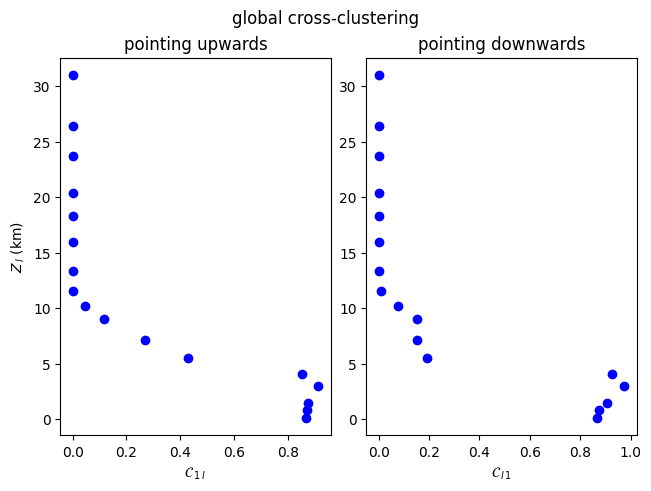

In [12]:
plot_global_asymmetric_coupling(np.array(cross_global_clustering), "global cross-clustering", r"\mathcal{C}")

#### Cross-Transitivity

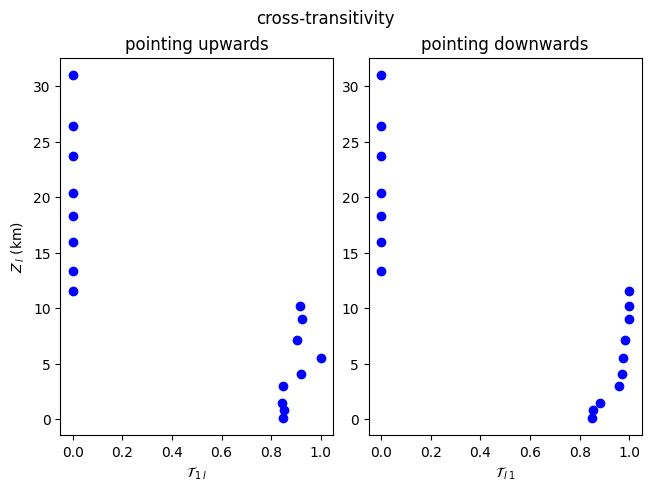

In [13]:
plot_global_asymmetric_coupling(np.array(cross_transitivity), "cross-transitivity", r"\mathcal{T}")

### Local Measures

For visualising the three-dimensional fields of local cross-network measures $m^{ij}_{v(\vartheta,\phi)}$, where $\vartheta$ and $\phi$ denote latitude and longitude, we choose to focus on their variation with height and latitude, and therefore consider zonal averages along circles of constant latitude,
$$ m^{ij}(\vartheta)=\langle m^{ij}_{v(\vartheta,\phi)} \rangle _\phi \,. $$

When computing local asymmetric cross-network measures for two subnetworks $G_i$ and $G_j$, `climate.CoupledClimateNetwork` returns values for all vertices $v$ of the coupled network in form of a pair of Numpy arrays, i.e., tuples $(m_{\,\cdot}^{ij},m_{\,\cdot}^{ji})$ where $m_{\,\cdot}^{ij}$ is a 1-D Numpy array ordered by latitude *and* longitude. In order to select the measures of the nodes by latitude and longitude, we need to reshape the output array into a $N_{\vartheta} \times N_{\phi}$ matrix, with $N_{\vartheta}$/$N_{\phi}$ being the number of latitude/longitude values. In our example, these numbers are the same for all 17 generated coupled climate networks.

In [14]:
from typing import List, Tuple, Callable, Optional

lat, lon = [
    np.unique(coupled_network.grid_1.__getattribute__(f"{coo}_sequence")())
    for coo in ["lat", "lon"]]
X, Y = np.meshgrid(lat, hgt_averaged)

def plot_zonal_coupling(
    measure: List[Tuple[np.ndarray,...]], title: str, clabel: str,
    vert_labels: Tuple[str, str] = tuple(
        [f"pointing {v}wards" for v in ['up', 'down']]),
    vert_indices: Tuple[str, str] = (r"^{\,1l}", r"^{\,l1}"),
    transform: Optional[Callable[[np.ndarray], np.ndarray]] = None):
    """
    Zonal heat plot of a coupling network measure.
    """
    fig, axes = plt.subplots(1, 2, layout="constrained")
    fig.suptitle(title)
    Z = np.zeros((VERTICAL_LEVELS, len(lat)))
    
    # plot both vertical directions of coupling
    for vert in range(2):
        # average over lon with same lat
        for l in range(VERTICAL_LEVELS):
            Z[l] = measure[l][vert].reshape(len(lat), len(lon)).mean(axis=1)
        Z = Z if transform is None else transform(Z)
        ax = axes[vert]
        pcm = ax.pcolormesh(X, Y, Z)
        ax.set_title(vert_labels[vert])
        ax.set_xlabel(r"Latitude $\vartheta$ (°N)")
        if vert == 0:
            ax.set_ylabel(r"$Z_{\,l}$ (km)")
        fig.colorbar(
            pcm, ax=ax,
            label=r"${}".format(clabel) + vert_indices[vert] + r"(\vartheta)$")

#### Cross-Degree

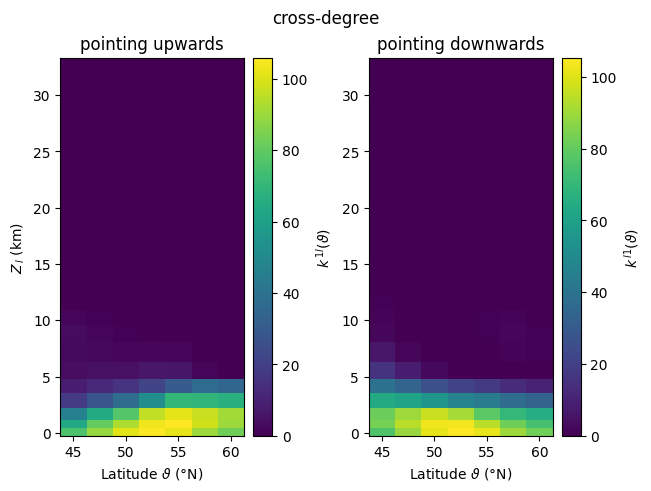

In [15]:
plot_zonal_coupling(cross_degree, "cross-degree", "k")

#### Cross-Closeness

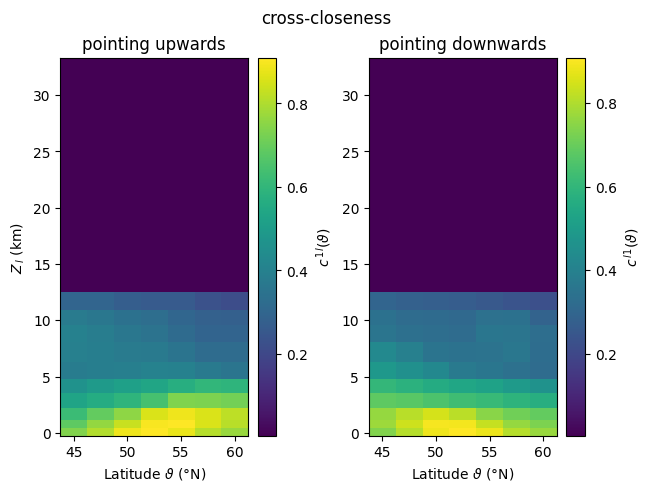

In [16]:
plot_zonal_coupling(cross_closeness, "cross-closeness", "c")

#### Cross-Betweenness

In contrast to the previous two local measures, cross-betweenness $b^{ij}_w$ is defined for $w\in V_i \cup V_j$ and is *symmetric* w.r.t. exchanging the involved subnetworks. Therefore, in the following we analyse the zonally averaged fields of cross-betweenness
for vertices taken from a specific isobaric subnetwork $i$,
$$ b^{ij}_i(\vartheta)=\langle b^{ij}_{w(\vartheta,\phi)}\rangle_{\phi,w\in V_i}\,.$$

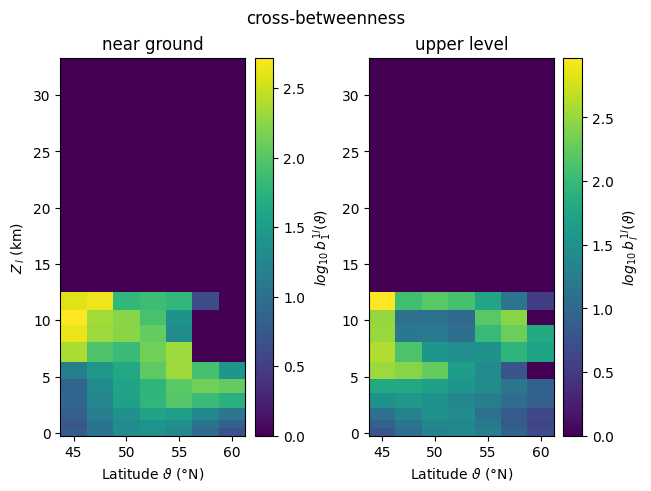

In [17]:
def clip_log(Z):
    neg = Z <= 1
    return np.where(neg, 0, np.log10(Z, where=np.logical_not(neg)))

plot_zonal_coupling(
    cross_betweenness, "cross-betweenness", "log_{10}\,b",
    vert_labels=("near ground", "upper level"),
    vert_indices=(r"_{\,1}^{\,1l}", r"_{\,l}^{\,1l}"),
    transform=clip_log)